# Spotify Popularity Predictions

## Import Required Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import math
import string

import warnings

import sklearn.neighbors
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from scipy.sparse import csr_matrix

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

from collections import OrderedDict

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

## Import data

In [14]:
x_tr = pd.read_csv('./data/x.csv', usecols = (3,4,5,6,7,8,9,10,11,12,13,14))
x = x_tr.values.tolist()

y = np.loadtxt('./data/y.csv', delimiter=',', skiprows=1, encoding="utf8")
for i in range (len(y)):
    if y[i] >= 80:
        y[i] = 1
    else:
        y[i] = 0
        
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

## Logistic Regression

### Baseline Prediction

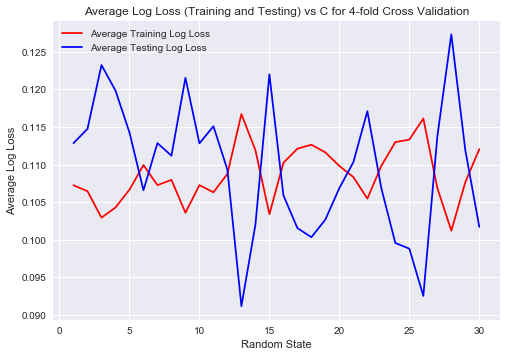

       C  Average Training Log Loss  Average Testing Log Loss
0    1.0                   0.107262                  0.112852
1    2.0                   0.106462                  0.114750
2    3.0                   0.102951                  0.123230
3    4.0                   0.104297                  0.119848
4    5.0                   0.106673                  0.114271
5    6.0                   0.109941                  0.106593
6    7.0                   0.107270                  0.112854
7    8.0                   0.107975                  0.111191
8    9.0                   0.103601                  0.121532
9   10.0                   0.107276                  0.112823
10  11.0                   0.106321                  0.115101
11  12.0                   0.108771                  0.109324
12  13.0                   0.116714                  0.091182
13  14.0                   0.111920                  0.102010
14  15.0                   0.103416                  0.122006
15  16.0

In [92]:
random_states = np.linspace(1,30,30)
train_loss = list()
test_loss = list()

for i in range (len(random_states)):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    logisticRegression = LogisticRegression(solver = 'liblinear')
    logisticRegression.fit(x_train, y_train)
    
    y_train_predict = logisticRegression.predict_proba(x_train)
    y_test_predict = logisticRegression.predict_proba(x_test)
    
    train_loss.append(sklearn.metrics.log_loss(y_train, y_train_predict))
    test_loss.append(sklearn.metrics.log_loss(y_test, y_test_predict))

    
plt.plot(random_states, train_loss, color='red', label='Average Training Log Loss')
plt.plot(random_states, test_loss, color='blue', label='Average Testing Log Loss')

plt.title('Average Log Loss (Training and Testing) vs C for 4-fold Cross Validation')
plt.xlabel('Random State')
plt.ylabel('Average Log Loss')
plt.legend()
plt.show()

#Make table of results
table = zip(random_states, train_loss, test_loss)
headers = ["C", "Average Training Log Loss", "Average Testing Log Loss"]

df = pd.DataFrame(table, columns = headers)
print(df)

In [12]:
x_tr = pd.read_csv('./data/x.csv', usecols = (3,8,9))
x = x_tr.values.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

logisticRegression = LogisticRegression(solver = 'liblinear')
logisticRegression.fit(x_train, y_train)

y_train_predict = logisticRegression.predict_proba(x_train)
y_test_predict = logisticRegression.predict_proba(x_test)

print("Accuracy score: ",logisticRegression.score(x_train, y_train))
print("Log Loss: " , sklearn.metrics.log_loss(y_test, y_test_predict[:,1]))

Accuracy score:  0.976465730800991
Log Loss:  0.0822715211715117


In [116]:
x_tr = pd.read_csv('./data/x.csv', usecols = (3,8,9))
x = x_tr.values.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

mlp_sgd = MLPClassifier(hidden_layer_sizes=[2],
        activation='logistic',
        max_iter=400, tol=1e-8,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,)
with warnings.catch_warnings(record=True) as warn_list:
    mlp_sgd.fit(x_train, y_train)
mlp_sgd.did_converge = True if len(warn_list) == 0 else False

y_test_predict = mlp_sgd.predict_proba(x_test)

print("Accuracy score: ",mlp_sgd.score(x_train, y_train))
print("Log Loss: " , sklearn.metrics.log_loss(y_test, y_test_predict[:,1]))

Accuracy score:  0.976465730800991
Log Loss:  0.08170736040476595


In [126]:
x_tr = pd.read_csv('./data/x.csv', usecols = (3,8,9))
x = x_tr.values.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

svc = SVC(probability=True)
svc.fit(x_train, y_train)

y_test_predict = svc.predict_proba(x_test)

print("Accuracy score: ", svc.score(x_train, y_train))
print("Log Loss: " , sklearn.metrics.log_loss(y_test, y_test_predict[:,1]))

Accuracy score:  0.976465730800991
Log Loss:  0.0834759623152273


[0.10092426 0.10499422 0.08100513 0.10590601 0.01816883 0.09906833
 0.10836047 0.06950482 0.094999   0.110258   0.09276146 0.01404947]


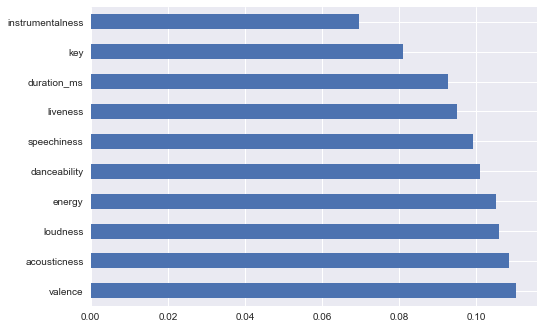

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","duration_ms","explicit"])
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [123]:
clf = DecisionTreeClassifier(criterion='entropy')

#Generate tree for simplified data
clf = clf.fit(x_train, y_train)
train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)

print(clf.feature_importances_)

[0.12289031 0.08978239 0.02530986 0.10582757 0.01175878 0.10935606
 0.16964734 0.05849469 0.10137886 0.07865676 0.1005564  0.02634098]


In [57]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
print(model.feature_importances_)

[0.10444801 0.10272431 0.07924332 0.10812761 0.02007754 0.10211038
 0.10836123 0.0693063  0.09633913 0.10712276 0.08854084 0.01359857]


In [58]:
corrmat = x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[-3.89445149e-11, -1.00437303e-10, -5.53595426e-10,
         9.99154715e-10, -1.11208736e-10, -3.52546733e-11,
        -2.74031876e-11, -6.70595715e-12, -5.66483043e-11,
        -5.82319413e-11, -1.82488263e-05,  8.76573537e-11]])